# Exercise 2: plot time series of temperature and salinity 

The goal of the exercise it to read data from a mooring located in the [Ibiza Channel](http://socib.es/?seccion=observingFacilities&facility=mooring&id=146) and represent the temperature and salinity corresponding to December 2015. 

## Import packages

Add packages that you will need:
* [netCDF4](http://unidata.github.io/netcdf4-python/) to read the data file
* [numpy](http://www.numpy.org/) 
* [matplotlib](http://matplotlib.org/) for the plots

In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import rcParams
# to have the figure inside the notebook
%matplotlib inline 

# Read data

The data file is found in the [thredds directory](http://thredds.socib.es/thredds/catalog/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/catalog.html), in the L1/2015 directory, where we can find the file corresponding to December.

In [2]:
datafile = "http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/L1/2015/dep0003_buoy-canaldeibiza_scb-sbe37006_L1_2015-12.nc"

## Read variables

The variables to be used are:
* temperature
* salinity
* time

To avoid to have to close the file, use the contruction [with ... as ...](https://docs.python.org/2/reference/compound_stmts.html#the-with-statement). <br>
There is an example in the notebook: *Data_ReadWrite/read_netcdf_opendap.ipynb* 

**Comment:** there are many ways to find the variable name, for example browsing the [thredds catalog](http://thredds.socib.es/thredds/dodsC/mooring/conductivity_and_temperature_recorder/buoy_canaldeibiza-scb_sbe37006/L1/2015/dep0003_buoy-canaldeibiza_scb-sbe37006_L1_2015-12.nc.html).<br>
Another possibility is to generate a list of variable names (nc.variables).

In [3]:
with netCDF4.Dataset(datafile) as nc:
    temperature = nc.variables['WTR_TEM_SBE37'][:]
    salinity = nc.variables['SALT_SBE37'][:]
    stationtime = nc.variables['time'][:]

**Comment:** we set the name of the time array as *stationtime* in order to avoid confusion with the [time module](https://docs.python.org/2/library/time.html).

Check the dimension of the arrays where the data are stored.

In [4]:
print temperature.shape
print salinity.shape
print stationtime.shape

(744,)
(744,)
(744,)


# Make the plot

The figure will be made up of two subplot, one over the other.<br>
See examples in the notebook *Plotting/plot_subfigure.ipynb*.

## 1st plot: basic plot

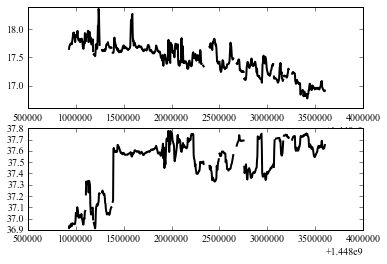

In [5]:
fig = plt.figure()
ax = plt.subplot(211)
plt.plot(stationtime, temperature)
ax = plt.subplot(212)
plt.plot(stationtime, salinity)
plt.show()
plt.close()

## 2nd plot: improved plot

We create a new figure adding:
* a title
* x- and ylabels
* the units.

The [*num2date*](http://netcdf4-python.googlecode.com/svn/trunk/docs/netcdftime.netcdftime-module.html#num2date) function is used to change time format using the *units* attribute of the variable.

In [6]:
with netCDF4.Dataset(datafile) as nc:
    temperature = nc.variables['WTR_TEM_SBE37'][:]
    salinity = nc.variables['SALT_SBE37'][:]
    stationtime_units = nc.variables['time'].units
stationtime2 = netCDF4.num2date(stationtime, stationtime_units)

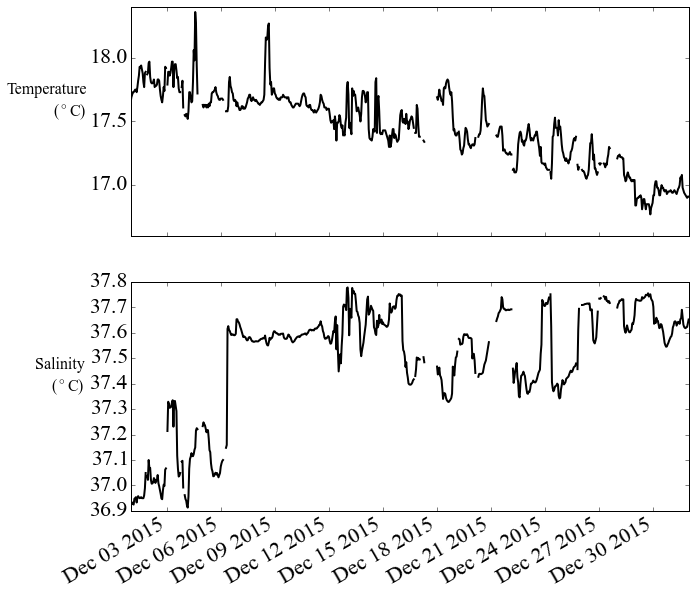

In [7]:
rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(211)
plt.plot(stationtime2, temperature)
plt.ylabel('Temperature\n($^{\circ}$C)', horizontalalignment='right', rotation=0, fontsize=16)
ax = plt.subplot(212)
plt.plot(stationtime2, salinity)
plt.ylabel('Salinity\n($^{\circ}$C)', horizontalalignment='right', rotation=0, fontsize=16)
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

# Subsidiary questions

## cf-python

Instead of using netcdf4 to read the file, use [cf-python](http://cfpython.bitbucket.org/).
You may have to install it on your machine.

In [8]:
import cf

In [9]:
f = cf.read(datafile)
temperature = f.select('sea_water_temperature')
salinity = f.select('sea_water_salinity')
stationtime = temperature.coord('time')

And we run again the code to generate the figure to be sure we have the same result.<br>
Note that we extract the units directly from the variable we have loaded with cf.

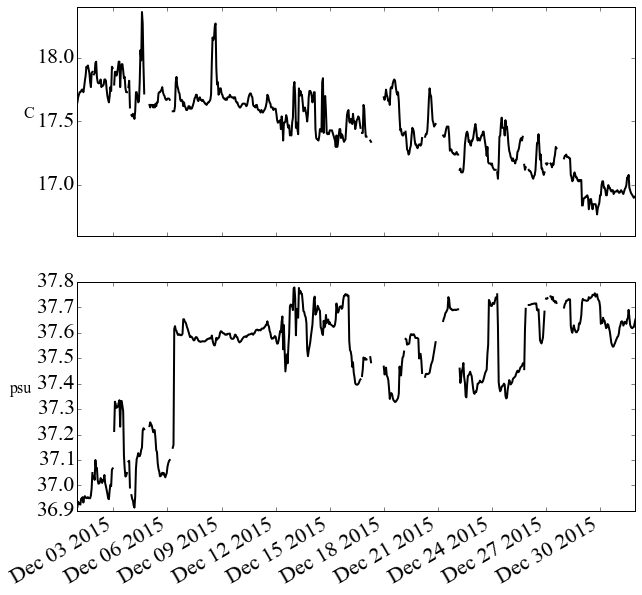

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(211)
plt.plot(stationtime2, temperature)
plt.ylabel(temperature.units, horizontalalignment='right', rotation=0, fontsize=16)
ax = plt.subplot(212)
plt.plot(stationtime2, salinity)
plt.ylabel(salinity.units, horizontalalignment='right', rotation=0, fontsize=16)
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

## Min and max values

To find the time when the minimal and maximal values of salinity occur, we can use the functions [argmin](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.argmin.html) and [argmax](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.argmax.html), which return the indices of the minimium/maximum values along an axis. However, as there are nan values in the vector, we will prefer the use of [nanargmin](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.nanargmin.html) and [nanargmax](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.nanargmax.html).

In [11]:
index_salinitymin = np.nanargmin(salinity.array)
index_salinitymax = np.nanargmax(salinity.array)

With the indices and the time vector containing the dates, we have all what we need:

In [12]:
print('Time where the minimal salinity occur: %s' %(stationtime2[index_salinitymin]))
print('Time where the maximal salinity occur: %s' %(stationtime2[index_salinitymax]))

Time where the minimal salinity occur: 2015-12-04 04:00:00
Time where the maximal salinity occur: 2015-12-13 01:00:00


Finally, we represent the values on the plot to confirm the results are correct.

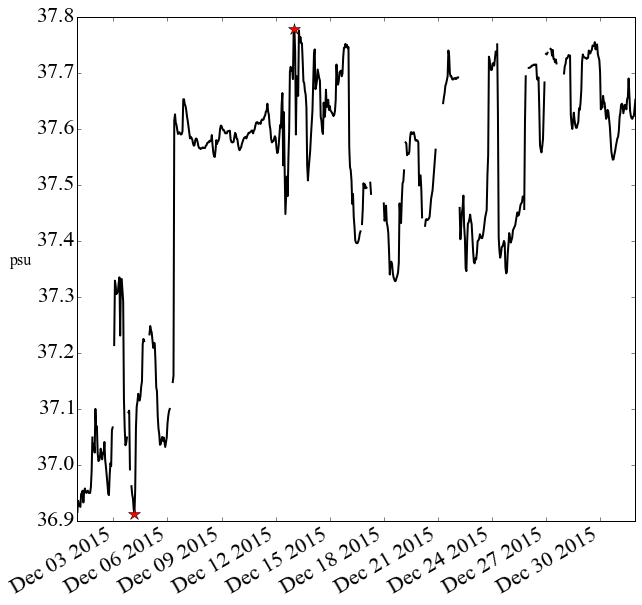

In [13]:
fig = plt.figure(figsize=(10, 10))
plt.plot(stationtime2, salinity)
plt.ylabel(salinity.units, horizontalalignment='right', rotation=0, fontsize=16)
plt.plot(stationtime2[index_salinitymin], salinity.array[index_salinitymin], 'r*', ms=12)
plt.plot(stationtime2[index_salinitymax], salinity.array[index_salinitymax], 'r*', ms=12)

plt.gcf().autofmt_xdate()
plt.show()
plt.close()